In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from scipy.integrate import odeint

In [2]:
#Problem 1 Part a
print 'For a merry-go-round, the graph would look like A, v=omega*r.'
print 'For planets, the graph would look like C,'
print 'GMm/r^2=mv^2/r,'
print 'v=sqrt(GM/r).'
print 'B looks like a log function, D appears to be proportional to r^2.'

In [3]:
#Problem 1 Part b
print 'Rotational speed rises fast from the center,'
print 'but after reaching a certain distance, the rate of change goes down,'
print 'the rotational speed then becomes almost constant'
print 'when we go further from the center.'
print 'Therefore, I would not say that the mass of a galaxy is distributed'
print 'with the overwhelming mejority of mass located in the center.'
print 'Mass density needs to increase before the critical point,'
print 'then is kept constant over distance changes.'

In [4]:
#Problem 1 Part c
print 'No.'
print 'I believe the mass distribution that came from derivation of '
print 'rotational speed is more likely to be correct,'
print 'because we are unable to measure invisible mass, '
print 'making the other graph inaccurate.'

(0, 400)

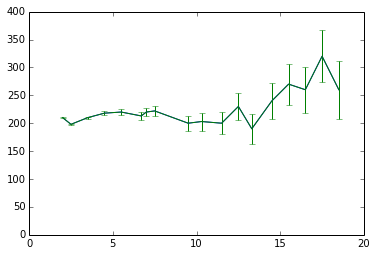

In [80]:
#Problem 2 Part a

xval = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
yval = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]
yerr = []
mul= 260*0.2/(18.5**2)
for i in xval:
    yerr.append(mul*i**2)
fig = plt.figure()

ax1=fig.add_subplot(111)
ax1.plot(xval, yval)
ax1.errorbar(xval, yval, yerr=yerr)
plt.xlim(0,20)
plt.ylim(0,400)

<function matplotlib.pyplot.show>

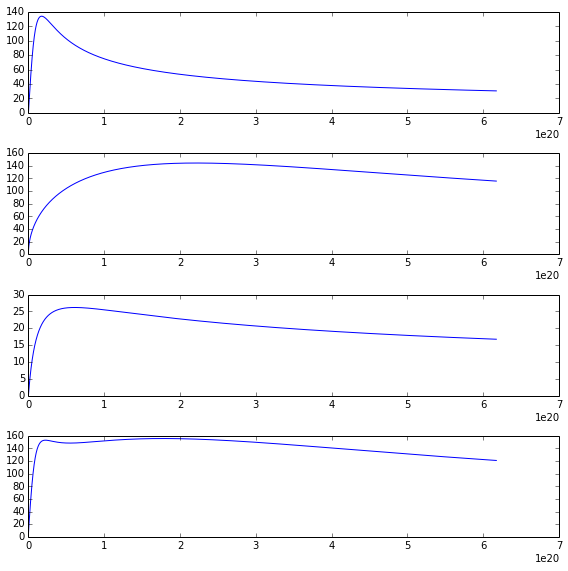

In [98]:
#Problem 2 Part b
pi=np.pi

ahadd = 0
ab = 0.4*3.086e19
ad = 4.0*3.086e19
ah = 0.5*3.086e19+ahadd*3.086e19



def bulge(M, r):
    rhob=M/(4*pi*ab**3)*(1+(r/ab)**2)**(-5./2.)
    dmdr=4*pi*r*r*rhob
    return dmdr
    
def disk(M, r):
    rhod=M/(2*pi*ad*ad)*np.exp(-r/ad)
    dmdr=2*pi*r*rhod
    return dmdr

def halo(M, r):
    rhoh=(M/(1e9*const.M_sun.value))*(((ah/(3.086e19))+(r/(3.086e19)))**(-3.1))
    dmdr=4*pi*(r/3.086e19)*(r/3.086e19)*rhoh*3.086e19
    rhoh2=(M/(1e9*const.M_sun.value))*((ah+r)**(-3.1))
    dmdr2=4*pi*r*r*rhoh2*3.086e19*3.086e19
    return dmdr2

m=[0,0,0]
madd = (1.3e10+6.5e10+10e9)*0
M=[1.3e10*const.M_sun.value, 6.5e10*const.M_sun.value, (10e9+madd)*const.M_sun.value]
r=0
sol = [[],[],[],[]]
radius=20*3.086e19
n = 10000
r0=np.linspace(1, radius, n)
dr = radius/n

for i in r0:
    m[0] += bulge(M[0], i)*dr
    m[1] += disk(M[1], i)*dr
    m[2] += halo(M[2], i)*dr
    v0 = np.sqrt(const.G.value*m[0]/i/1000000)
    v1 = np.sqrt(const.G.value*m[1]/i/1000000)
    v2 = np.sqrt(const.G.value*m[2]/i/1000000)
    vt = np.sqrt(const.G.value*(m[0]+m[1]+m[2])/i/1000000)
    sol[0].append(v0)
    sol[1].append(v1)
    sol[2].append(v2)
    sol[3].append(vt)

#print sol


fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(411)
ax1.plot(r0, sol[0])

ax2 = fig.add_subplot(412)
ax2.plot(r0, sol[1])

ax3 = fig.add_subplot(413)
ax3.plot(r0, sol[2])

ax4 = fig.add_subplot(414)
ax4.plot(r0, sol[3])

plt.legend()
plt.tight_layout()
plt.show

In [76]:
#Problem 2 Part c

print 'No. We need more mass at large radius.'

No. We need more mass at large radius.


We need a lot more mass and a larger scale radius.
In order to obtain a good plot, I need 11 times higher scale radius
and 100 times more total mass.
However, I think those numbers are way too large.
Should be due to approximations in calculations, I think it is
acceptable as it's not off by many 10th powers.


<function matplotlib.pyplot.show>

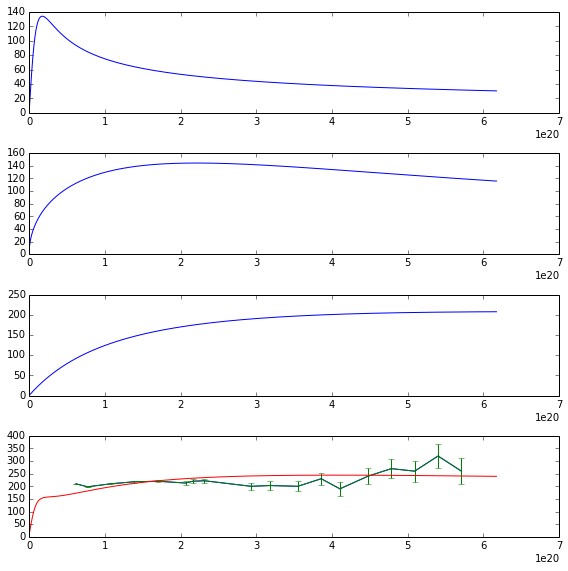

In [119]:
#Problem 2 Part d

print 'We need a lot more mass and a larger scale radius.'
print 'In order to obtain a good plot, I need 11 times higher scale radius' 
print 'and 100 times more total mass.'
print 'However, I think those numbers are way too large.'
print 'Should be due to approximations in calculations, I think it is' 
print 'acceptable as it\'s not off by many 10th powers.'

pi=np.pi

ahadd = 5
ab = 0.4*3.086e19
ad = 4.0*3.086e19
ah = 0.5*3.086e19+ahadd*3.086e19



def bulge(M, r):
    rhob=M/(4*pi*ab**3)*(1+(r/ab)**2)**(-5./2.)
    dmdr=4*pi*r*r*rhob
    return dmdr
    
def disk(M, r):
    rhod=M/(2*pi*ad*ad)*np.exp(-r/ad)
    dmdr=2*pi*r*rhod
    return dmdr

def halo(M, r):
    rhoh=(M/(1e9*const.M_sun.value))*(((ah/(3.086e19))+(r/(3.086e19)))**(-3.1))
    dmdr=4*pi*(r/3.086e19)*(r/3.086e19)*rhoh*3.086e19
    rhoh2=(M/(1e9*const.M_sun.value))*((ah+r)**(-3.1))
    dmdr2=4*pi*r*r*rhoh2*3.086e19*3.086e19
    return dmdr2

m=[0,0,0]
madd = (1.3e10+6.5e10+10e9)*100
M=[1.3e10*const.M_sun.value, 6.5e10*const.M_sun.value, (10e9+madd)*const.M_sun.value]
r=0
sol = [[],[],[],[]]
radius=20*3.086e19
n = 10000
r0=np.linspace(1, radius, n)
dr = radius/n

for i in r0:
    m[0] += bulge(M[0], i)*dr
    m[1] += disk(M[1], i)*dr
    m[2] += halo(M[2], i)*dr
    v0 = np.sqrt(const.G.value*m[0]/i/1000000)
    v1 = np.sqrt(const.G.value*m[1]/i/1000000)
    v2 = np.sqrt(const.G.value*m[2]/i/1000000)
    vt = np.sqrt(const.G.value*(m[0]+m[1]+m[2])/i/1000000)
    sol[0].append(v0)
    sol[1].append(v1)
    sol[2].append(v2)
    sol[3].append(vt)

#print sol


fig = plt.figure(1, figsize=(8,8))

xval = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5, 9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
yval = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]
yerr = []
for i in range(0, 18):
    xval[i] = xval[i]*3.086e19
mul= 260*0.2/(18.5**2)
for i in xval:
    yerr.append(mul*(i/3.086e19)**2)

ax1=fig.add_subplot(414)
ax1.plot(xval, yval)
ax1.errorbar(xval, yval, yerr=yerr)

ax1 = fig.add_subplot(411)
ax1.plot(r0, sol[0])

ax2 = fig.add_subplot(412)
ax2.plot(r0, sol[1])

ax3 = fig.add_subplot(413)
ax3.plot(r0, sol[2])

ax4 = fig.add_subplot(414)
ax4.plot(r0, sol[3])

plt.legend()
plt.tight_layout()
plt.show